# **Scatter Plot**


##  Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




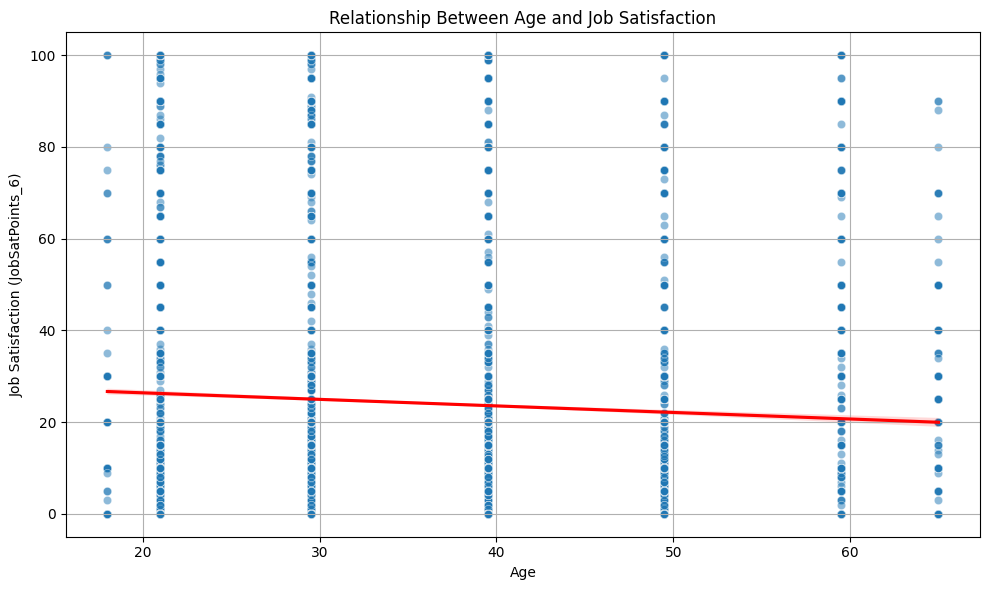

In [3]:
import numpy as np
# Map the age to midpoint of range
age_mapping = {'Under 18 years old': 18,
               '18-24 years old': (18+24)/2,
               '25-34 years old': (25+34)/2,
               '35-44 years old': (35+44)/2,
               '45-54 years old': (45+54)/2,
               '55-64 years old': (55+64)/2,
               '65 years or older': 65,
               }

df["Age_mapped"] = df["Age"].map(age_mapping)

# Drop NULL values
df = df.dropna(subset=['Age_mapped'])
df['Age_mapped'] = pd.to_numeric(df['Age_mapped'], errors='coerce')

# Assuming your dataframe is named df and Age is numeric or cleaned already
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age_mapped', y='JobSatPoints_6', alpha=0.5)
sns.regplot(data=df, x='Age_mapped', y='JobSatPoints_6', scatter=False, color='red')

plt.title('Relationship Between Age and Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')


plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


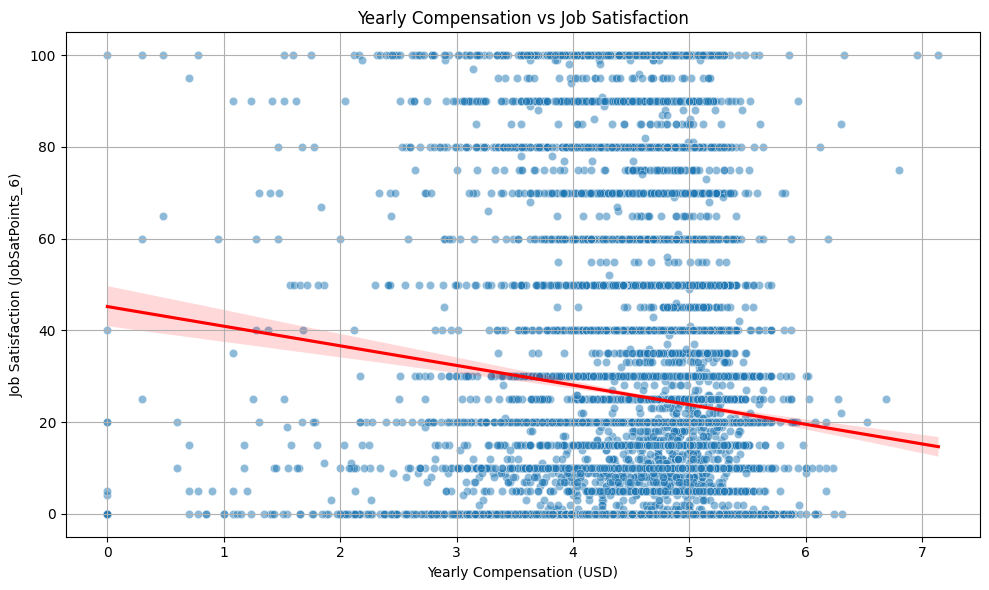

In [4]:

# Drop missing or invalid compensation values
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df[df['ConvertedCompYearly'] > 0]

df = df.dropna(subset=['JobSatPoints_6','ConvertedCompYearly'])
#apply a log scale if compensation values vary greatly
df['ConvertedCompYearly'] = np.log10(df['ConvertedCompYearly'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6', alpha=0.5)
sns.regplot(data=df, x='ConvertedCompYearly', y='JobSatPoints_6', scatter=False, color='red')

plt.title('Yearly Compensation vs Job Satisfaction')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


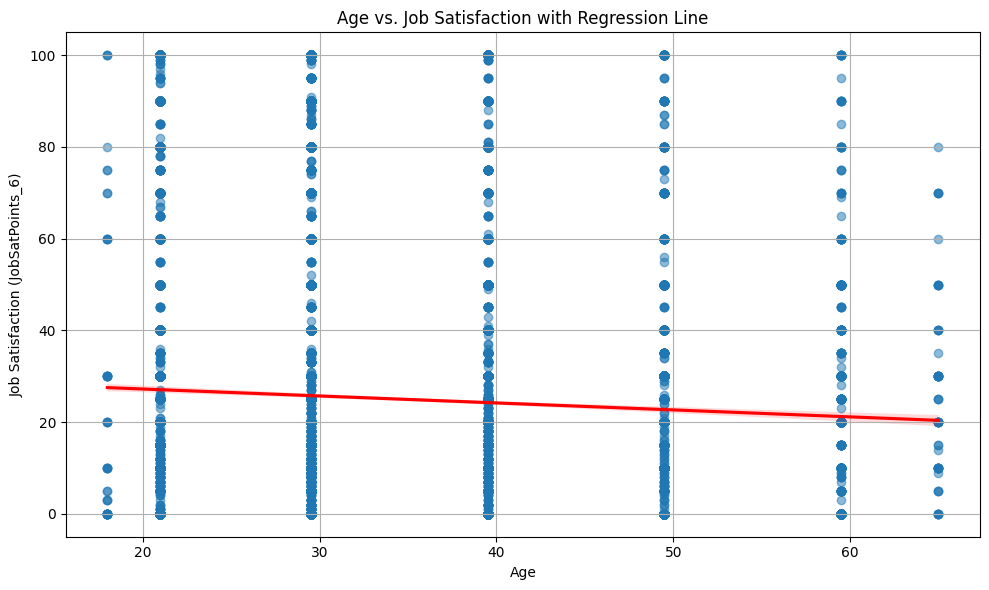

In [16]:
# Map the age to midpoint of range
age_mapping = {'Under 18 years old': 18,
               '18-24 years old': (18+24)/2,
               '25-34 years old': (25+34)/2,
               '35-44 years old': (35+44)/2,
               '45-54 years old': (45+54)/2,
               '55-64 years old': (55+64)/2,
               '65 years or older': 65,
               }

df["Age_mapped"] = df["Age"].map(age_mapping)

# Drop NULL values
df = df.dropna(subset=['JobSatPoints_6','Age_mapped'])
df['Age_mapped'] = pd.to_numeric(df['Age_mapped'], errors='coerce')
# Plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age_mapped', y='JobSatPoints_6', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Age vs. Job Satisfaction with Regression Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


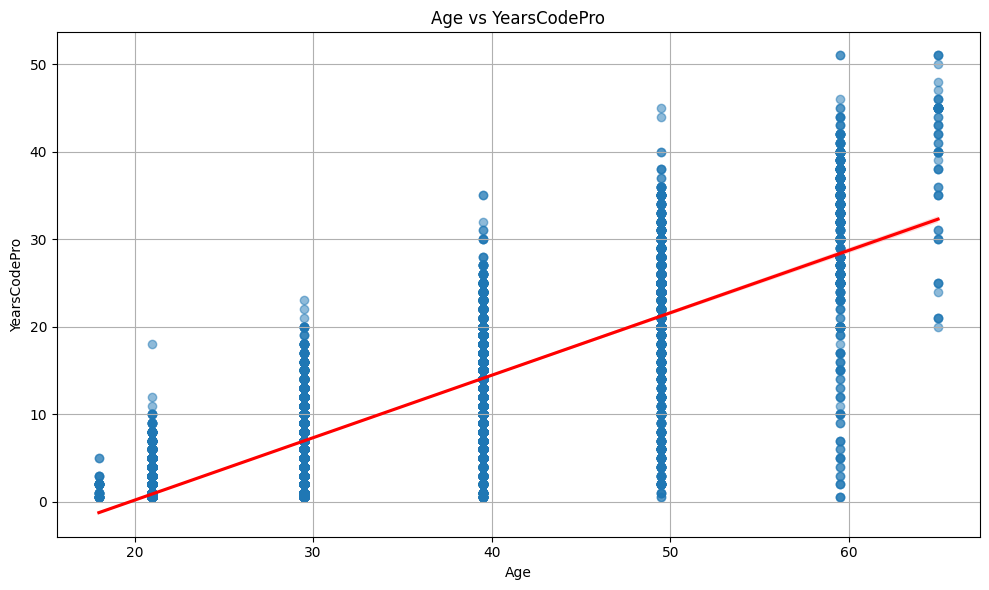

In [15]:
# Map the age to midpoint of range
age_mapping = {'Under 18 years old': 18,
               '18-24 years old': (18+24)/2,
               '25-34 years old': (25+34)/2,
               '35-44 years old': (35+44)/2,
               '45-54 years old': (45+54)/2,
               '55-64 years old': (55+64)/2,
               '65 years or older': 65,
               }

df["Age_mapped"] = df["Age"].map(age_mapping)
df['Age_mapped'] = pd.to_numeric(df['Age_mapped'], errors='coerce')
# Convert YearsCodePro to numeric (handle 'Less than 1 year' and 'More than 50 years')
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})

# Convert compensation column to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows where Age_mapped is still NaN after conversion
df = df.dropna(subset=['YearsCodePro','Age_mapped'])
#  Filter out invalid compensation values
df = df[df['YearsCodePro'] > 0]

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Age_mapped', y='YearsCodePro', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.title('Age vs YearsCodePro')
plt.xlabel('Age')
plt.ylabel('YearsCodePro')
plt.grid(True)
plt.tight_layout()
plt.show()



### Task 3: Combining Scatter Plots with Additional Features


#### Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


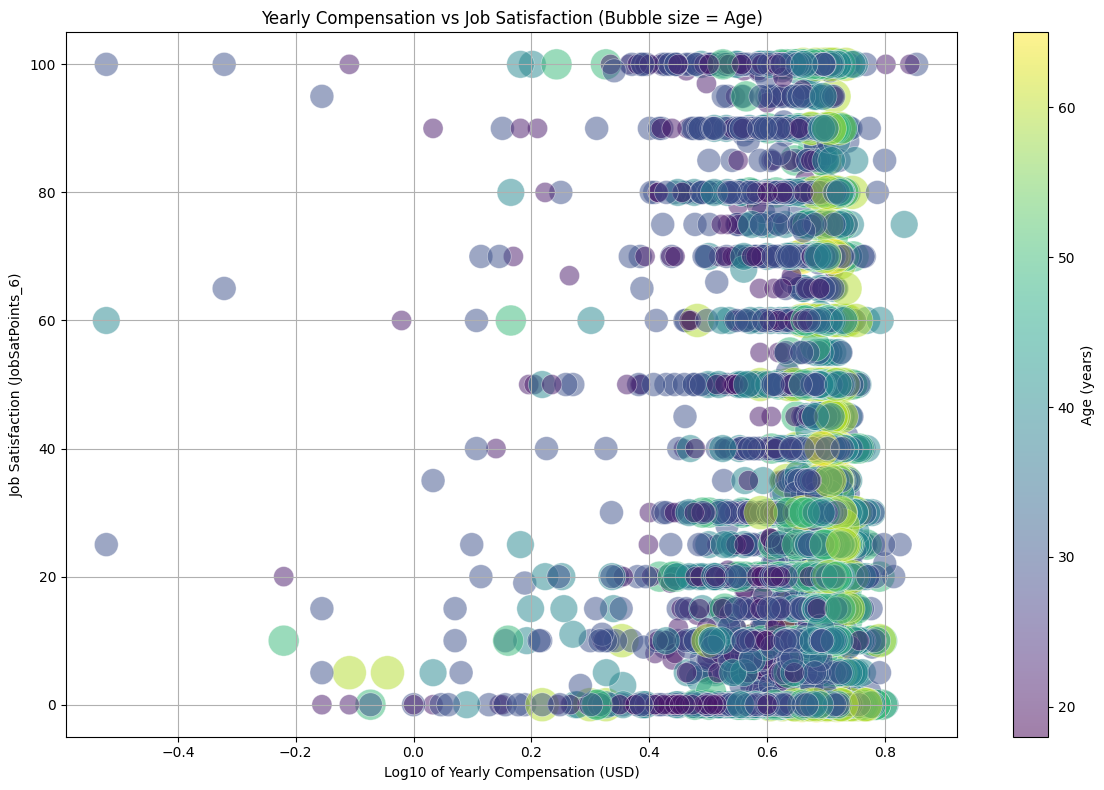

In [7]:

# Sample age mapping (adjust as per your actual 'Age' column values)
age_mapping = {
    'Under 18 years old': 18,
    '18-24 years old': (18 + 24) / 2,
    '25-34 years old': (25 + 34) / 2,
    '35-44 years old': (35 + 44) / 2,
    '45-54 years old': (45 + 54) / 2,
    '55-64 years old': (55 + 64) / 2,
    '65 years or older': 65,
}

# Map Age column to numeric
df['Age_mapped'] = df['Age'].map(age_mapping)
df['Age_mapped'] = pd.to_numeric(df['Age_mapped'], errors='coerce')

# Clean compensation and job satisfaction columns
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age_mapped'])

# Filter out non-positive compensation to avoid issues with log
df = df[df['ConvertedCompYearly'] > 0]

# Apply log10 transform to yearly compensation for better visualization
df['LogCompensation'] = np.log10(df['ConvertedCompYearly'])

# Plot bubble plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=df['LogCompensation'],
    y=df['JobSatPoints_6'],
    s=df['Age_mapped'] * 10,  # bubble size scaled by age (adjust multiplier as needed)
    alpha=0.5,
    c=df['Age_mapped'],       # color bubbles by age (optional)
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

plt.colorbar(scatter, label='Age (years)')
plt.title('Yearly Compensation vs Job Satisfaction (Bubble size = Age)')
plt.xlabel('Log10 of Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.tight_layout()
plt.show()



### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


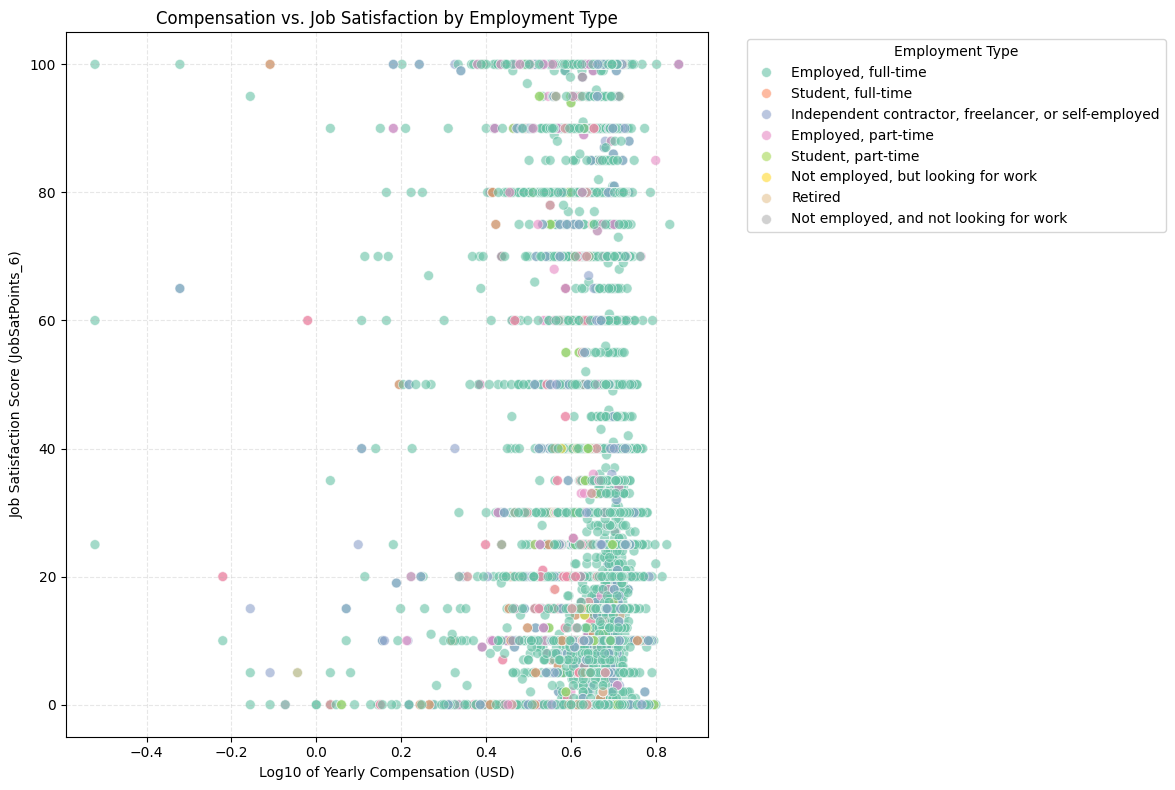

In [14]:
# Ensure 'ConvertedCompYearly' is numeric and positive
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df[df['ConvertedCompYearly'] > 0]

# Drop missing values in key columns
df = df.dropna(subset=['JobSatPoints_6', 'ConvertedCompYearly', 'Employment'])

# Optional: Apply log scale to compensation (for wide salary range)
df['LogCompensation'] = np.log10(df['ConvertedCompYearly'])
# Step 4: Split and explode employment types
df['Employment'] = df['Employment'].str.split(';')
df = df.explode('Employment')
df['Employment'] = df['Employment'].str.strip()  # remove extra spaces


# Order employment types by frequency
employment_order = df['Employment'].value_counts().index.tolist()

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='LogCompensation',
    y='JobSatPoints_6',
    hue='Employment',
    alpha=0.6,
    s=50,
    palette='Set2'
)

plt.title('Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Log10 of Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score (JobSatPoints_6)')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


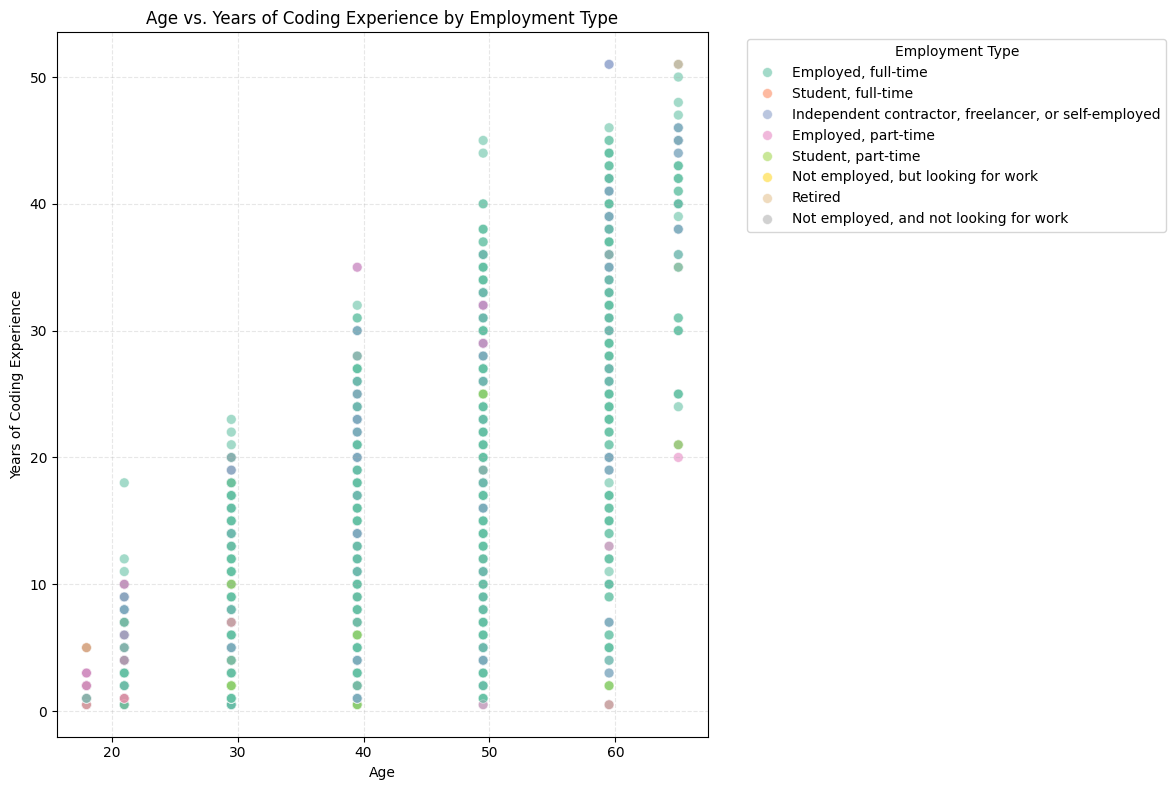

In [17]:
# Map the age to midpoint of range
age_mapping = {'Under 18 years old': 18,
               '18-24 years old': (18+24)/2,
               '25-34 years old': (25+34)/2,
               '35-44 years old': (35+44)/2,
               '45-54 years old': (45+54)/2,
               '55-64 years old': (55+64)/2,
               '65 years or older': 65,
               }

df["Age_mapped"] = df["Age"].map(age_mapping)
df['Age_mapped'] = pd.to_numeric(df['Age_mapped'], errors='coerce')
# Convert YearsCodePro to numeric (handle 'Less than 1 year' and 'More than 50 years')
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.5',
    'More than 50 years': '51'
})

# Convert compensation column to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows where Age_mapped is still NaN after conversion
df = df.dropna(subset=['YearsCodePro','Age_mapped'])
#  Filter out invalid compensation values
df = df[df['YearsCodePro'] > 0]

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Age_mapped',
    y='YearsCodePro',
    hue='Employment',
    alpha=0.6,
    s=50,
    palette='Set2'
)

plt.title('Age vs. Years of Coding Experience by Employment Type')
plt.xlabel('Age')
plt.ylabel('Years of Coding Experience')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()